# Unit 5 - Financial Planning


In [59]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
import datetime as dt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
av_HH_inc = 12000
my_btc = 1.2
my_eth = 5.3
SPY_stocks = 50
AGG_bonds = 200

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [78]:
# Fetch current BTC price
# YOUR CODE HERE!
BTC_request=requests.get(btc_url)

import json
BTC_data=BTC_request.json()
print(json.dumps(BTC_data, indent=4))
BTC_nested_1= BTC_data["data"]["1"]
BTC_nested_2=BTC_nested_1["quotes"]["USD"]
BTC_price = BTC_nested_2["price"]

# Fetch current ETH price
# YOUR CODE HERE!]
ETH_request=requests.get(eth_url)
import json
eth_data=ETH_request.json()
print(json.dumps(eth_data, indent=4))
ETH_nested_1= eth_data["data"]["1027"]
ETH_nested_2=ETH_nested_1["quotes"]["USD"]
ETH_price = ETH_nested_2["price"]

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value= BTC_price * my_btc
my_eth_value= ETH_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18641431,
            "total_supply": 18641431,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 46490.0,
                    "volume_24h": 61983393984,
                    "market_cap": 870022889912,
                    "percentage_change_1h": 2.77114119340591,
                    "percentage_change_24h": 0.0209135230236777,
                    "percentage_change_7d": -19.3848977162786,
                    "percent_change_1h": 2.77114119340591,
                    "percent_change_24h": 0.0209135230236777,
                    "percent_change_7d": -19.3848977162786
                },
                "CAD": {
                    "price": 59014.406,
                    "volume_24h": 78681720323.2896,
                    

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Current amount of shares
# YOUR CODE HERE!
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
base_url = 'https://paper-api.alpaca.markets'

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url,
    api_version="v2")
alpaca

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-02-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-02-26 00:00:00-05:00  114.96  115.39  114.5915  115.37  9735524  384.35   

                                                              
                             high     low   close     volume  
time                                                          
2021-02-26 00:00:00-05:00  385.58  378.23  380.32  134902084

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]
df_closing_prices.index = df_closing_prices.index.date
agg_close_price=df_closing_prices["AGG"][0]
spy_close_price=df_closing_prices["SPY"][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.37
Current SPY closing price: $380.32


In [13]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19016.00
The current value of your 200 AGG shares is $23074.00


### Savings Health Analysis

In [79]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame([my_btc_value+my_eth_value,my_spy_value + my_agg_value],index=["crypto","shares"],
columns=["amount"])


# Display savings DataFrame
display(df_savings)

,amount
crypto,63477.717
shares,42090.000


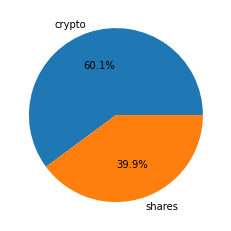

In [80]:
# Plot savings pie chart
# YOUR CODE HERE!
import matplotlib.pyplot as plt
df_savings_pie=plt.pie(df_savings["amount"], labels = ["crypto","shares"],autopct='%1.1f%%')
plt.show() 


In [81]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=df_savings.values.sum()

print(total_savings)

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congrats, you have enough in your savings account for an emergency fund")
elif total_savings == emergency_fund:
    print("Congrats on reaching your emergency fund goal!")
else:
    print(f"You are {emergency_fund-total_savings} away from reaching your savings goal")

36000
105567.717
Congrats, you have enough in your savings account for an emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [52]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-02-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-02-26', tz='America/New_York').isoformat()

In [60]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
date_list = [["2016-02-26"],["2021-02-26"]]
limit = np.busday_count(date_list[0][0], date_list[1][0])
# Logic for data that is greater than Alpca's 1000 limit but below 2000 rows (5 year limit)
if limit > 1000: 
    newend = dt.datetime.strftime((pd.to_datetime(date_list[0][0]) + pd.DateOffset(days=1000)),"%Y-%m-%d")
    date_list[0].insert(1, newend)
    newstart = dt.datetime.strftime((pd.to_datetime(date_list[0][0]) + pd.DateOffset(days=1001)),"%Y-%m-%d")
    date_list[1].insert(0, newstart)
    ticker_data = []
    # Get AGG/SPY historical data for data greater than 1000 rows
    for i in range(2):
        data = alpaca.get_barset(
        tickers,
        timeframe,
        start = pd.Timestamp(date_list[i][0], tz="America/New_York").isoformat(),
        end = pd.Timestamp(date_list[i][1], tz="America/New_York").isoformat(),
        limit = 1000
        ).df
        ticker_data.append(data)
    all_ticker_data = pd.concat(ticker_data, axis="rows", join="inner")
else:
    # Get AGG/SPY historical data for data less than 1000 rows
    all_ticker_data = alpaca.get_barset(
        tickers,
        timeframe,
        start = pd.Timestamp(date_list[0][0], tz="America/New_York").isoformat(),
        end = pd.Timestamp(date_list[1][0], tz="America/New_York").isoformat(),
        limit = 1000
        ).df
    
# Display sample data
all_ticker_data.head(5)

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2016-02-26 00:00:00-05:00  109.90  109.97  109.80  109.95  1891851.0  196.57   
2016-02-29 00:00:00-05:00  109.94  110.10  109.91  110.07  3467613.0  195.10   
2016-03-01 00:00:00-05:00  109.93  110.05  109.40  109.53  3777497.0  195.01   
2016-03-02 00:00:00-05:00  109.45  109.48  109.32  109.44  2469445.0  197.74   
2016-03-03 00:00:00-05:00  109.47  109.61  109.37  109.55  3295456.0  198.79   

                                                                 
                              high       low   close     volume  
time                                                             
2016-02-26 00:00:00-05:00  196.680  194.9000  195.13   94022841  
2016-02-29 00:00:00-05:00  196.230  193.4400  193.48   89686326  
2016-03-01 00:00:00-05:00  198.180  194.4542  198.18  103686820  
2016-03-02 00:00:00-05:00  199.060  197.2500  199.00   77556290  
2016-03-03 00:00:00-05:00  199.795  198.1100  199.76   70588424

In [61]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_AGG_SPY_dist = MCSimulation(
    portfolio_data = all_ticker_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [63]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_AGG_SPY_dist.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2016-02-26 00:00:00-05:00  109.90  109.97  109.80  109.95  1891851.0   
2016-02-29 00:00:00-05:00  109.94  110.10  109.91  110.07  3467613.0   
2016-03-01 00:00:00-05:00  109.93  110.05  109.40  109.53  3777497.0   
2016-03-02 00:00:00-05:00  109.45  109.48  109.32  109.44  2469445.0   
2016-03-03 00:00:00-05:00  109.47  109.61  109.37  109.55  3295456.0   

                                           SPY                             \
                          daily_return    open     high       low   close   
time                                                                        
2016-02-26 00:00:00-05:00          NaN  196.57  196.680  194.9000  195.13   
2016-02-29 00:00:00-05:00     0.001091  195.10  196.230  193.4400  193.48   
2016-03-01 00:00:00-05:00    -0.004906  195.01  198.180  194.4542  198.18   
2016-03-02 00:00:00-05:00    -0.000822  197.74  199.060  197.2500  199.00   
2016-03-03 00:00:00-05:00     0.001005  198.79  199.795  198.1100  199.76   

                                                   
                              volume daily_return  
time                                               
2016-02-26 00:00:00-05:00   94022841          NaN  
2016-02-29 00:00:00-05:00   89686326    -0.008456  
2016-03-01 00:00:00-05:00  103686820     0.024292  
2016-03-02 00:00:00-05:00   77556290     0.004138  
2016-03-03 00:00:00-05:00   70588424     0.003819

In [65]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_AGG_SPY_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995578,1.006567,1.001414,0.999314,0.995622,1.003297,1.004340,0.998985,0.998735,1.009593,...,1.005018,0.998308,1.010269,0.991316,1.004773,1.006037,1.004080,0.994630,0.994140,0.985198
2,0.997611,1.003151,1.016373,1.001048,0.988374,0.998549,1.012284,1.003282,1.000016,0.991828,...,0.998877,0.995985,1.018667,0.995455,1.015411,1.007669,1.012819,0.999709,0.986536,0.983843
3,1.001798,1.005362,1.024731,0.998334,0.987373,0.987866,1.017697,1.002160,1.003085,0.992399,...,1.004844,1.000089,1.016101,0.997378,1.021586,1.000297,1.019338,0.999899,0.987275,0.983824
4,1.005913,1.004961,1.028134,0.987514,0.982976,0.990062,1.009677,1.000953,0.999222,0.994609,...,1.002535,1.001825,1.013287,1.003884,1.026340,0.993814,1.019616,0.992100,0.995355,0.994678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.689878,14.456928,11.047180,14.523828,9.515519,17.216209,9.061838,7.581064,19.398748,23.266817,...,13.877415,10.453905,14.975840,10.784834,17.563190,6.872394,16.712286,13.119784,11.825232,9.757055
7557,21.459908,14.586339,11.170894,14.649082,9.393045,17.323430,9.087665,7.595251,19.516599,23.401317,...,13.807848,10.380967,14.979196,10.695247,17.670635,6.953233,16.650986,13.111004,11.679987,9.809276
7558,21.163279,14.666564,11.163207,14.739617,9.483364,17.424427,8.954517,7.585615,19.608638,23.688468,...,14.010696,10.445370,15.001481,10.699394,17.875089,7.005961,16.697693,13.112125,11.640424,9.837219
7559,21.129663,14.635181,11.126455,14.878758,9.501599,17.478025,9.025464,7.596578,19.629657,23.546054,...,13.855255,10.397470,14.918934,10.832814,17.842682,6.969321,16.706286,12.906199,11.665260,9.732724


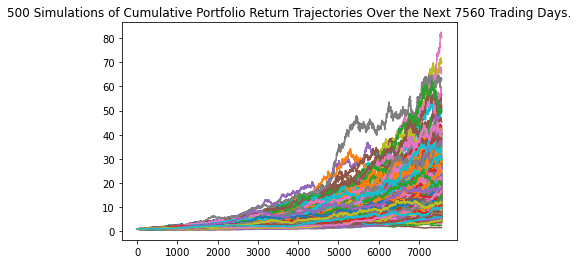

In [66]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_AGG_SPY_plot = MC_AGG_SPY_dist.plot_simulation()

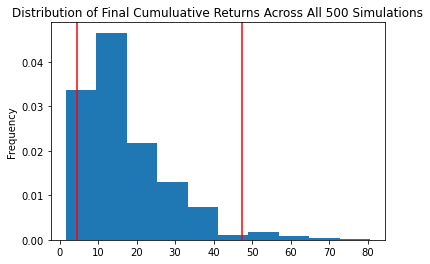

In [67]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_AGG_SPY_dist.plot_distribution()

### Retirement Analysis

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_AGG_SPY_tbl = MC_AGG_SPY_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_AGG_SPY_tbl)

count           500.000000
mean             17.124694
std              11.345270
min               1.626281
25%               9.033098
50%              13.828907
75%              21.590549
max              80.607964
95% CI Lower      4.525161
95% CI Upper     47.298755
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [69]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(MC_AGG_SPY_tbl[8]*20000,2)
ci_upper = round(MC_AGG_SPY_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $90503.22 and $945975.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [70]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(MC_AGG_SPY_tbl[8]*20000*1.5,2)
ci_upper = round(MC_AGG_SPY_tbl[9]*20000*1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $135754.82 and $1418962.66


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [82]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Ten Years Retirement Option